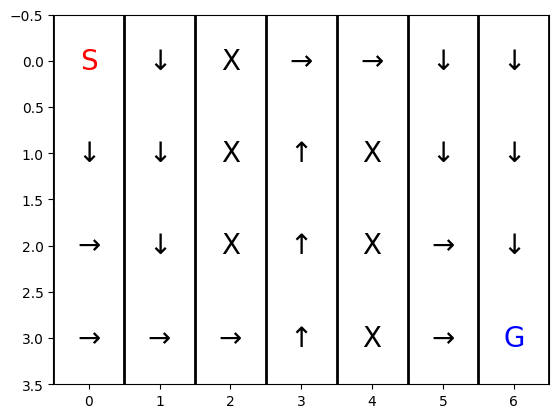

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Grid environment settings
grid_size = (4, 7)
obstacles = [(0, 2), (1, 2), (2, 2), (1, 4), (2, 4), (3, 4)]  # Obstacle positions
start_state = (0, 0)
goal_state = (3, 6)

# Action space: Up, Down, Left, Right
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
action_names = ['↑', '↓', '←', '→']

# Initialize Q-table
Q = {state: np.zeros(len(actions)) for state in np.ndindex(grid_size)}

# Set reward table
rewards = np.full(grid_size, -1)  # Default reward for movement
for obs in obstacles:
    rewards[obs] = -100  # Penalty for obstacles
rewards[goal_state] = 100  # Reward for reaching the goal

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
initial_epsilon = 1.0  # Initial exploration probability
min_epsilon = 0.01  # Minimum exploration probability
epsilon_decay = 0.995  # Decay rate per episode
num_episodes = 1000  # Number of training episodes
epsilon = initial_epsilon  # Initial epsilon value

# Training loop
for episode in range(num_episodes):
    state = start_state
    while state != goal_state:
        # Exploration vs. Exploitation decision
        if np.random.uniform(0, 1) < epsilon:
            action_idx = np.random.choice(len(actions))  # Exploration
        else:
            action_idx = np.argmax(Q[state])  # Exploitation

        action = actions[action_idx]
        next_state = (state[0] + action[0], state[1] + action[1])

        # Check grid boundaries and obstacles
        if (0 <= next_state[0] < grid_size[0] and
            0 <= next_state[1] < grid_size[1] and
            next_state not in obstacles):
            reward = rewards[next_state]
        else:
            next_state = state  # Stay in place if hitting a boundary or obstacle
            reward = -10  # Penalty for hitting an obstacle

        # Update Q-value
        Q[state][action_idx] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action_idx])
        state = next_state

    # Decrease epsilon (ensuring it does not go below the minimum)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Extract optimal policy
policy = np.zeros(grid_size, dtype=int)
for state in Q:
    if state != goal_state:
        policy[state] = np.argmax(Q[state])

# Visualization
fig, ax = plt.subplots()
ax.set_xticks(np.arange(grid_size[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(grid_size[0] + 1) - 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(which="minor", size=0)

# Add text and symbols
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        state = (i, j)
        if state == start_state:
            ax.text(j, i, 'S', va='center', ha='center', fontsize=20, color='red')  # Start position
        elif state == goal_state:
            ax.text(j, i, 'G', va='center', ha='center', fontsize=20, color='blue')  # Goal position
        elif state in obstacles:
            ax.text(j, i, 'X', va='center', ha='center', fontsize=20, color='black')  # Obstacle
        else:
            ax.text(j, i, action_names[policy[state]], va='center', ha='center', fontsize=20)

ax.set_xlim(-0.5, grid_size[1] - 0.5)
ax.set_ylim(-0.5, grid_size[0] - 0.5)
ax.invert_yaxis()
plt.show()
